In [12]:
from keras.layers import  Dense,Dropout,SimpleRNN,LSTM
from keras.models import  Sequential
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
df = pd.read_csv('台灣電力公司_過去電力供需資訊.csv')
df.head()
df['日期'] = pd.to_datetime(df['日期'], format='%Y%m%d')
df = df.loc[:, ['日期', '備轉容量(MW)']]

df['dayofweek'] = df['日期'].dt.dayofweek

df = df.set_index('日期')
df

,備轉容量(MW),dayofweek
日期,,
2021-01-01,2767,4
2021-01-02,2936,5
2021-01-03,3037,6
2021-01-04,3032,0
2021-01-05,3067,1
...,...,...
2022-02-24,2511,3
2022-02-25,3406,4
2022-02-26,3437,5


In [14]:
df.isna().sum()

備轉容量(MW)     0
dayofweek    0
dtype: int64

<AxesSubplot:xlabel='日期'>

D:\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


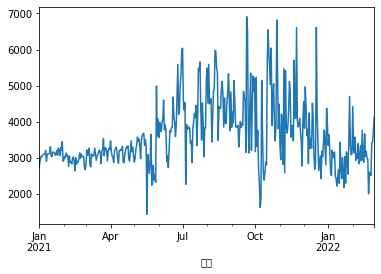

In [15]:
df['備轉容量(MW)'].plot()

In [36]:
scaler = MinMaxScaler()
train = df[0:278]
test = df[278:]
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns, index=train.index)
test = pd.DataFrame(scaler.fit_transform(test), columns=test.columns, index=test.index)
print(train)
print(test)

            備轉容量(MW)  dayofweek
日期                             
2021-01-01  0.242967   0.666667
2021-01-02  0.273840   0.833333
2021-01-03  0.292291   1.000000
2021-01-04  0.291377   0.000000
2021-01-05  0.297771   0.166667
...              ...        ...
2021-10-01  0.317501   0.666667
2021-10-02  0.693825   0.833333
2021-10-03  0.343442   1.000000
2021-10-04  0.423639   0.000000
2021-10-05  0.225247   0.166667

[278 rows x 2 columns]
            備轉容量(MW)  dayofweek
日期                             
2021-10-06  0.134541   0.333333
2021-10-07  0.000000   0.500000
2021-10-08  0.043369   0.666667
2021-10-09  0.676754   0.833333
2021-10-10  0.388011   1.000000
...              ...        ...
2022-02-24  0.170008   0.500000
2022-02-25  0.342521   0.666667
2022-02-26  0.348497   0.833333
2022-02-27  0.404973   1.000000
2022-02-28  0.481496   0.000000

[146 rows x 2 columns]


In [37]:
n_step = 7
feature_names = list(norm_data.columns)
X = []
y = []
indexes = []
norm_data_x = train[feature_names]
for i in range(0,len(train)-n_step): 
    X.append(norm_data_x.iloc[i:i+n_step].values) 
    y.append(train['備轉容量(MW)'].iloc[i+n_step-1]) #現有資料+30天的Y
    indexes.append(train.index[i+n_step-1]) #Y的日期
print(X[0])
print(y[0])

[[0.24296675 0.66666667]
 [0.27383997 0.83333333]
 [0.29229083 1.        ]
 [0.29137742 0.        ]
 [0.29777128 0.16666667]
 [0.30416514 0.33333333]
 [0.30416514 0.5       ]]
0.304165144318597


In [38]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(271, 7, 2)
(271,)


In [39]:
n_feature = 2

model = Sequential()

model.add(LSTM(40, activation='relu', return_sequences=False, input_shape=(n_step, n_feature)))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mape'])

In [40]:
X_train = X[0:278]
y_train = y[0:278]
batch_size = 100
epochs = 100
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs)


Epoch 1/100
3/3 [==============================] - 1s 40ms/step - loss: 0.0989 - mse: 0.0989 - mape: 372990.1250
Epoch 2/100
3/3 [==============================] - 0s 37ms/step - loss: 0.0812 - mse: 0.0812 - mape: 524572.8125
Epoch 3/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0639 - mse: 0.0639 - mape: 649897.8750
Epoch 4/100
3/3 [==============================] - 0s 35ms/step - loss: 0.0480 - mse: 0.0480 - mape: 739968.2500
Epoch 5/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0337 - mse: 0.0337 - mape: 983959.5000
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0224 - mse: 0.0224 - mape: 1155033.7500
Epoch 7/100
3/3 [==============================] - 0s 38ms/step - loss: 0.0159 - mse: 0.0159 - mape: 1215662.6250
Epoch 8/100
3/3 [==============================] - 0s 34ms/step - loss: 0.0149 - mse: 0.0149 - mape: 1500741.5000
Epoch 9/100
3/3 [==============================] - 0s 33ms/step - loss: 0.0174 - mse: 0.0174 

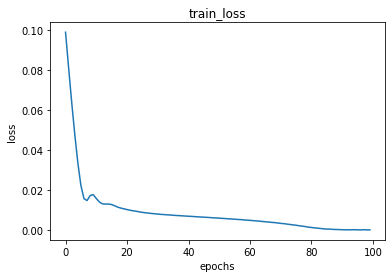

In [41]:
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.plot(history.history['loss'])

In [43]:
X = []
y = []
indexes = []
norm_data_x = test[feature_names]
for i in range(0,len(test)-n_step): 
  X.append(norm_data_x.iloc[i:i+n_step].values) 
  y.append(test['備轉容量(MW)'].iloc[i+n_step-1]) #現有資料+30天的Y
  indexes.append(test.index[i+n_step-1]) #Y的日期
X=np.array(X) # RD外的6個自變量，記憶體=30，EX:預測12/31的Y，用12/1~12/30的X
y=np.array(y)

In [44]:
predictions = model.predict(X)
predictions = pd.DataFrame(predictions).rename(columns={0: '預測值'})

y_test = pd.DataFrame(y).rename(columns={0: '實際值'})

final = pd.concat([predictions, y_test], axis=1)
final['mas'] = abs(final['預測值'] - final['實際值'])
final

,預測值,實際值,mas
0,0.175478,0.145528,0.029950
1,0.185231,0.181766,0.003465
2,0.236112,0.241904,0.005792
3,0.224655,0.227255,0.002600
4,0.709679,0.777564,0.067884
...,...,...,...
134,0.182664,0.180802,0.001862
135,0.177131,0.170008,0.007123
136,0.336396,0.342521,0.006125
137,0.353350,0.348497,0.004853


In [51]:
train = pd.DataFrame(scaler.inverse_transform(final), columns=df.columns)
train

ValueError: operands could not be broadcast together with shapes (139,3) (2,) (139,3) 